In [43]:
%config IPCompleter.greedy=True

## Libraries

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from pprint import pprint

## Helper Functions

In [45]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [46]:
def show_scores(result):
    for k, v in result.items():
        if k == 'fit_time' or k == 'score_time':
            continue
        else:
            print(f"{k:20} \t{v.mean():.4f}\t{v.std():>.8f} ")
    print()

# Data

## Data Set Preparations

In [47]:
df = pd.read_csv("outputs\songs.csv")
df.rename(columns={'Unnamed: 0': 'station_index'}, inplace=True)

df_X = df.iloc[:, 3:16]
df_y = df.liked

X = np.array(df.iloc[:, 3:16])
y = np.array(df.liked)

print(list(df_X.columns))
print(X.shape)

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
(2769, 13)


In [48]:
df.head()

,station_index,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0,I Don't Wanna Love You Anymore,LANY,0.702,0.623,0,-8.360,1,0.0417,0.3220,0.000000,0.0858,0.503,104.974,201198,4,1
1,1937,Beautiful Disaster,Jon McLaughlin,0.432,0.664,7,-4.662,1,0.0302,0.2150,0.000000,0.1500,0.294,156.216,251640,4,1
2,1925,Gone Too Soon,Simple Plan,0.204,0.811,2,-4.326,1,0.0313,0.0119,0.000000,0.0908,0.296,87.903,195547,4,1
3,1930,Your Guardian Angel,The Red Jumpsuit Apparatus,0.290,0.480,5,-6.583,1,0.0296,0.1160,0.000003,0.6260,0.382,112.620,229235,4,1
4,1931,Fall For Anything,The Script,0.558,0.842,10,-4.381,0,0.0340,0.1170,0.000000,0.0672,0.491,123.048,272773,4,1


In [49]:
df_X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.702,0.623,0,-8.360,1,0.0417,0.3220,0.000000,0.0858,0.503,104.974,201198,4
1,0.432,0.664,7,-4.662,1,0.0302,0.2150,0.000000,0.1500,0.294,156.216,251640,4
2,0.204,0.811,2,-4.326,1,0.0313,0.0119,0.000000,0.0908,0.296,87.903,195547,4
3,0.290,0.480,5,-6.583,1,0.0296,0.1160,0.000003,0.6260,0.382,112.620,229235,4
4,0.558,0.842,10,-4.381,0,0.0340,0.1170,0.000000,0.0672,0.491,123.048,272773,4


In [50]:
df_X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000
mean,0.602809,0.690871,5.237631,-6.076351,0.682196,0.078640,0.196182,0.058485,0.193433,0.510321,122.251697,219589.224269,3.966053
std,0.139289,0.197969,3.591076,3.194620,0.465707,0.077134,0.263128,0.203739,0.157193,0.227006,29.179527,45944.105725,0.263925
min,0.000000,0.004840,0.000000,-35.068000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,4366.000000,0.000000
25%,0.514000,0.571000,2.000000,-7.051000,0.000000,0.036300,0.013000,0.000000,0.095000,0.335000,98.072000,195547.000000,4.000000
50%,0.612000,0.731000,5.000000,-5.382000,1.000000,0.050800,0.073100,0.000000,0.130000,0.508000,120.971000,214648.000000,4.000000
75%,0.700000,0.845000,8.000000,-4.154000,1.000000,0.083500,0.264000,0.000046,0.253000,0.680000,140.060000,238027.000000,4.000000
max,0.967000,0.993000,11.000000,-0.005000,1.000000,0.967000,0.995000,0.979000,0.976000,0.975000,214.118000,850467.000000,5.000000


## Data Explorations

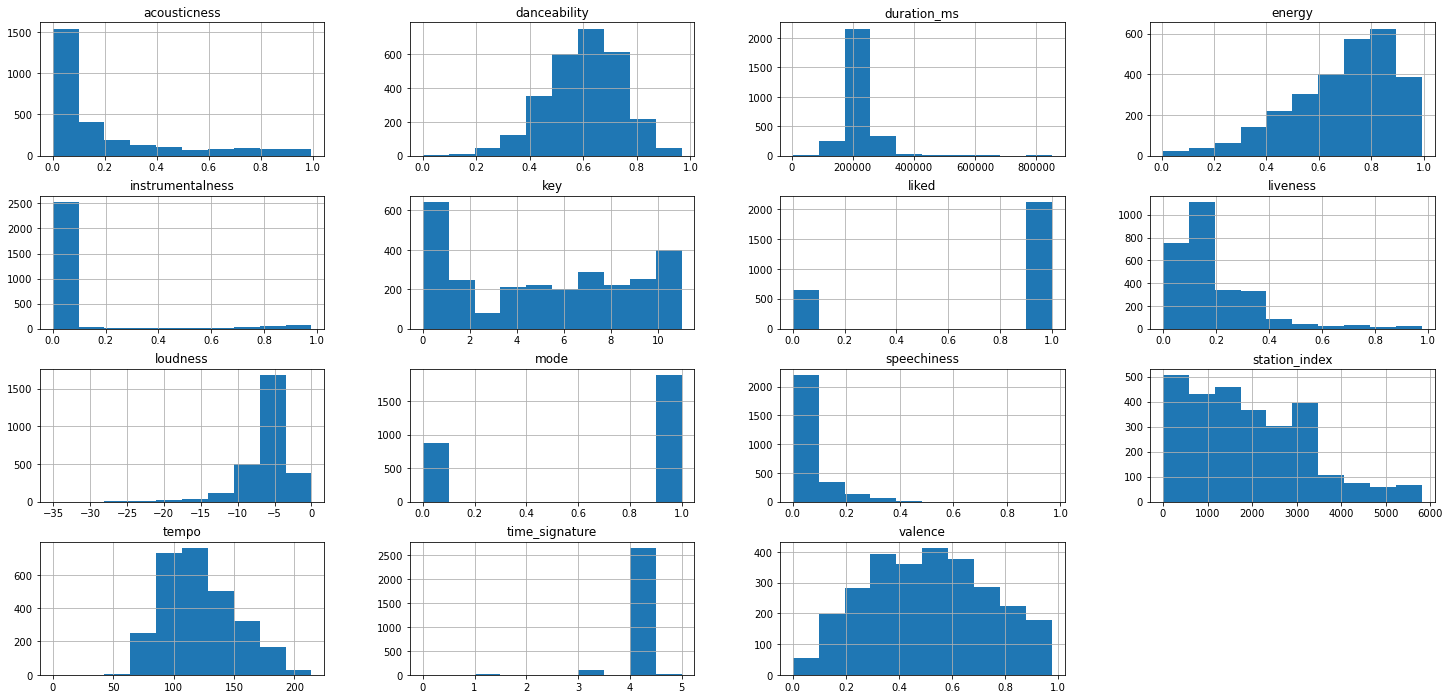

In [51]:
fig = plt.figure(figsize = (25,12))
ax = fig.gca()

df.hist(ax = ax)
plt.draw()

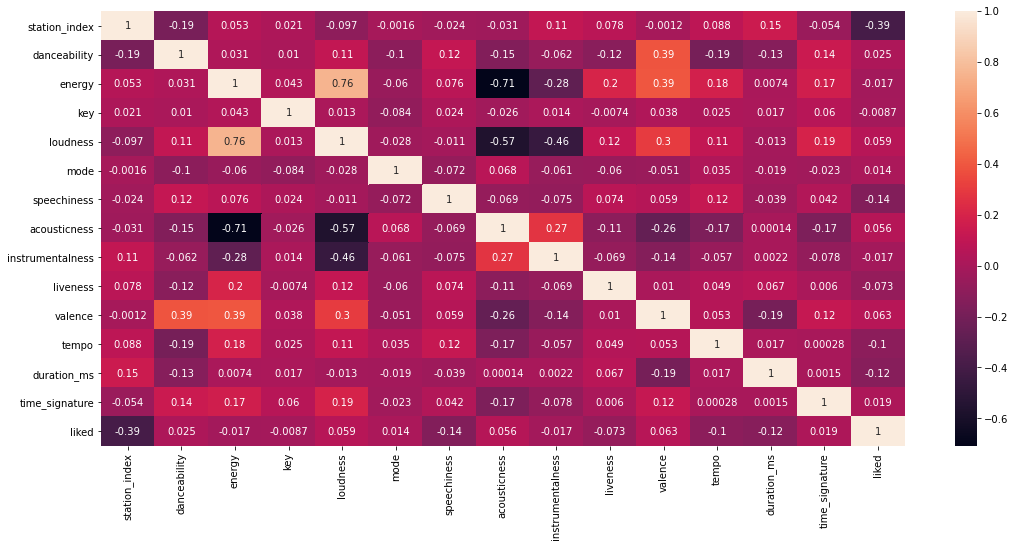

In [52]:
correlations = df.corr()
fig = plt.figure(figsize = (18,8))
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True)
plt.draw()

Trues: 0.7652582159624414 Falses: 0.2347417840375587


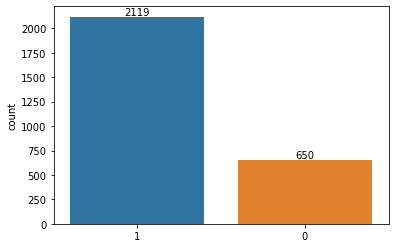

In [53]:
ax = sns.countplot(y, label="Sum", order=[1, 0])
values = df.liked.value_counts().values
value_total = values[0] + values[1]

for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 20, values[i], ha="center")
plt.draw()

print(f"Trues: {values[0]/value_total} Falses: {values[1]/value_total}")

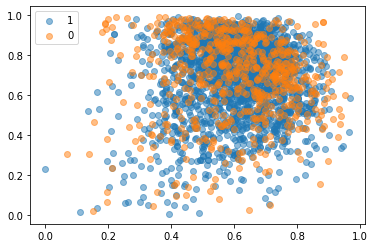

In [54]:
counter = Counter(y)
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], alpha=0.5, label=str(label))
plt.legend()
plt.draw()

# Feature Engineering

## Imports

In [55]:
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

## Feature Selection

In [56]:
sel = VarianceThreshold(threshold=.1)
sel.fit(df_X)
sel_X = sel.transform(df_X)

cols_indices = [(col, index) for col, index in zip(df_X.columns, sel.get_support()) if index == True]
pprint(cols_indices)

[('key', True),
 ('loudness', True),
 ('mode', True),
 ('tempo', True),
 ('duration_ms', True)]


In [57]:
df_columns = pd.DataFrame(df_X.columns)

In [58]:
best_features_f = SelectKBest(score_func=f_classif, k='all')
fit_f = best_features_f.fit(df_X, df_y)
df_scores_f = pd.DataFrame(fit_f.scores_)

feature_scores_f = pd.concat([df_columns, df_scores_f], axis=1)
feature_scores_f.columns = ['Features', 'Score (F)']
feature_scores_f.sort_values(['Score (F)'], inplace=True, ascending=False)

In [59]:
best_features_mi = SelectKBest(score_func=mutual_info_classif, k='all')
fit_mi = best_features_mi.fit(df_X, df_y)
df_scores_mi = pd.DataFrame(fit_mi.scores_)

feature_scores_mi = pd.concat([df_columns, df_scores_mi], axis=1)
feature_scores_mi.columns = ['Features', 'Score (MI)']
feature_scores_mi.sort_values(['Score (MI)'], inplace=True, ascending=False)

In [60]:
display_side_by_side([feature_scores_f, feature_scores_mi], ["F", "MI"])

,Features,Score (F)
5,speechiness,56.858382
11,duration_ms,43.178999
10,tempo,30.440568
8,liveness,14.882412
9,valence,11.134631
3,loudness,9.825199
6,acousticness,8.722136
0,danceability,1.750758
12,time_signature,1.016377
1,energy,0.809717


# Modeling

## Imports

In [78]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC


## Configuration

In [62]:
seed = 10
k_splits = 13
scoring = ['accuracy', 'balanced_accuracy', 'precision', 'recall' , 'f1', 'average_precision', 'roc_auc']
test_scoring = ['balanced_accuracy', 'f1', 'average_precision', 'roc_auc']
main_scorer = 'roc_auc'

## Base Models

In [80]:
base_models = []
base_models.append(DecisionTreeClassifier())
base_models.append(GaussianNB())
base_models.append(KNeighborsClassifier())
base_models.append(LinearDiscriminantAnalysis())
base_models.append(LogisticRegression())
base_models.append(QuadraticDiscriminantAnalysis())
base_models.append(SVC())

In [64]:
base_X = X
base_y = y

In [65]:
base_results = []

for model in base_models:
    skfold = model_selection.StratifiedKFold(n_splits=k_splits, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_validate(model, base_X, base_y, cv=skfold, scoring=scoring)
    base_results.append(cv_results)

In [66]:

for model, result in zip(base_models, base_results):
    print(f"{model}")
    print(f"Parameter\t\t Mean\t Std")
    show_scores(result)

DecisionTreeClassifier()
Parameter		 Mean	 Std
test_accuracy        	0.6417	0.02086509 
test_balanced_accuracy 	0.5169	0.02675602 
test_precision       	0.7735	0.01290324 
test_recall          	0.7522	0.02424773 
test_f1              	0.7625	0.01578716 
test_average_precision 	0.7719	0.01033750 
test_roc_auc         	0.5179	0.02708781 

GaussianNB()
Parameter		 Mean	 Std
test_accuracy        	0.7588	0.01742483 
test_balanced_accuracy 	0.5224	0.02099262 
test_precision       	0.7737	0.00795902 
test_recall          	0.9679	0.01850748 
test_f1              	0.8599	0.01088297 
test_average_precision 	0.8295	0.02272813 
test_roc_auc         	0.6225	0.04800923 

KNeighborsClassifier()
Parameter		 Mean	 Std
test_accuracy        	0.7277	0.02630140 
test_balanced_accuracy 	0.5213	0.03137252 
test_precision       	0.7737	0.01243543 
test_recall          	0.9103	0.02552738 
test_f1              	0.8364	0.01686881 
test_average_precision 	0.7787	0.02268075 
test_roc_auc         	0.5284	0.05272303

## New Models

In [67]:
new_models = []
new_results = []

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, shuffle=True, stratify=y)

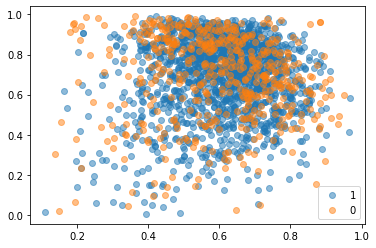

In [68]:
counter = Counter(y_train)
for label, _ in counter.items():
	row_ix = np.where(y_train == label)[0]
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], alpha=0.5, label=str(label))
plt.legend()
plt.draw()# plt.draw()

In [69]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

skfold = model_selection.StratifiedKFold(n_splits=k_splits, shuffle=True, random_state=seed)
cv_results = model_selection.cross_validate(clf, X_test, y_test, cv=skfold, scoring=scoring)

new_models.append(clf)
new_results.append(cv_results)

show_scores(cv_results)

test_accuracy        	0.6421	0.06183469 
test_balanced_accuracy 	0.5377	0.08449223 
test_precision       	0.7839	0.04632502 
test_recall          	0.7356	0.05410046 
test_f1              	0.7581	0.04434576 
test_average_precision 	0.7804	0.03719045 
test_roc_auc         	0.5390	0.08677787 



In [70]:
clf = GaussianNB()
clf.fit(X_train, y_train)

skfold = model_selection.StratifiedKFold(n_splits=k_splits, shuffle=True, random_state=seed)
cv_results = model_selection.cross_validate(clf, X_test, y_test, cv=skfold, scoring=scoring)

new_models.append(clf)
new_results.append(cv_results)


show_scores(cv_results)

test_accuracy        	0.7533	0.02509101 
test_balanced_accuracy 	0.5138	0.03405775 
test_precision       	0.7700	0.01500303 
test_recall          	0.9660	0.02274516 
test_f1              	0.8569	0.01512837 
test_average_precision 	0.8155	0.06168980 
test_roc_auc         	0.5701	0.10358756 



In [71]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

skfold = model_selection.StratifiedKFold(n_splits=k_splits, shuffle=True, random_state=seed)
cv_results = model_selection.cross_validate(clf, X_test, y_test, cv=skfold, scoring=scoring)

new_models.append(clf)
new_results.append(cv_results)

show_scores(cv_results)

test_accuracy        	0.7186	0.02664225 
test_balanced_accuracy 	0.5036	0.03449706 
test_precision       	0.7665	0.01371747 
test_recall          	0.9096	0.03742347 
test_f1              	0.8315	0.01799687 
test_average_precision 	0.7824	0.03346737 
test_roc_auc         	0.5319	0.07416458 



In [90]:
clf = LinearDiscriminantAnalysis()

skfold = model_selection.StratifiedKFold(n_splits=k_splits, shuffle=True, random_state=seed)

parameters = [
    {
        'solver': ['svd']
    },
    {
        'solver': ['lsqr', 'eigen'],
        'shrinkage': [None, 'auto']
    }
    ]

for scorer in test_scoring:
    GS = GridSearchCV(clf, parameters, cv=skfold, scoring=scorer, n_jobs=-1,)
    GS.fit(X_train, y_train)
    print(f"{scorer} {GS.best_params_}\n {GS.best_score_}\n")
    if scorer == main_scorer:
        best_clf = GS.best_estimator_


new_models.append(best_clf)

cv_results = model_selection.cross_validate(best_clf, X_test, y_test, cv=skfold, scoring=scoring, n_jobs=-1)
new_results.append(cv_results)

show_scores(cv_results)

balanced_accuracy {'solver': 'svd'}
 0.5345029074484661

f1 {'shrinkage': 'auto', 'solver': 'lsqr'}
 0.8670801488934406

average_precision {'solver': 'svd'}
 0.8450237023634544

roc_auc {'solver': 'svd'}
 0.656461714107077

test_accuracy        	0.7750	0.02125021 
test_balanced_accuracy 	0.5405	0.03442663 
test_precision       	0.7802	0.01460948 
test_recall          	0.9830	0.02042940 
test_f1              	0.8698	0.01268118 
test_average_precision 	0.8393	0.05508839 
test_roc_auc         	0.6190	0.09522388 



In [74]:
clf = LogisticRegression()

skfold = model_selection.StratifiedKFold(n_splits=k_splits, shuffle=True, random_state=seed)

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 50, 100, 200, 500, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'max_iter': [300, 500],
    'class_weight': [None, 'balanced']
    }

for scorer in test_scoring:
    GS = GridSearchCV(clf, parameters, cv=skfold, scoring=scorer, n_jobs=-1,)
    GS.fit(X_train, y_train)
    print(f"{scorer} {GS.best_params_}\n {GS.best_score_}\n")
    if scorer == main_scorer:
        best_clf = GS.best_estimator_


new_models.append(best_clf)

cv_results = model_selection.cross_validate(best_clf, X_test, y_test, cv=skfold, scoring=scoring, n_jobs=-1)
new_results.append(cv_results)

show_scores(cv_results)

balanced_accuracy {'C': 10, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
 0.6289422626835031

f1 {'C': 200, 'class_weight': None, 'max_iter': 300, 'penalty': 'l2', 'solver': 'newton-cg'}
 0.8682491639111091

average_precision {'C': 50, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
 0.8495525094116239

roc_auc {'C': 1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
 0.6600775745433671

test_accuracy        	0.5916	0.06718697 
test_balanced_accuracy 	0.5610	0.07437052 
test_precision       	0.8011	0.04597082 
test_recall          	0.6190	0.07259697 
test_f1              	0.6969	0.05794729 
test_average_precision 	0.8403	0.05907503 
test_roc_auc         	0.6160	0.10192412 



In [89]:
clf = QuadraticDiscriminantAnalysis()

skfold = model_selection.StratifiedKFold(n_splits=k_splits, shuffle=True, random_state=seed)

parameters = {
    'reg_param': [None, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }

for scorer in test_scoring:
    GS = GridSearchCV(clf, parameters, cv=skfold, scoring=scorer, n_jobs=-1,)
    GS.fit(X_train, y_train)
    print(f"{scorer} {GS.best_params_}\n {GS.best_score_}\n")
    if scorer == main_scorer:
        best_clf = GS.best_estimator_


new_models.append(best_clf)

cv_results = model_selection.cross_validate(best_clf, X_test, y_test, cv=skfold, scoring=scoring, n_jobs=-1)
new_results.append(cv_results)

show_scores(cv_results)

balanced_accuracy {'reg_param': 0.8}
 0.5949864573993869

f1 {'reg_param': 0.05}
 0.861055116427552

average_precision {'reg_param': 0.01}
 0.8523977049467246

roc_auc {'reg_param': 0.01}
 0.6689021841750223

test_accuracy        	0.7317	0.03483790 
test_balanced_accuracy 	0.5417	0.05295948 
test_precision       	0.7824	0.02334184 
test_recall          	0.8999	0.03802879 
test_f1              	0.8366	0.02338543 
test_average_precision 	0.8325	0.03455699 
test_roc_auc         	0.6057	0.08015958 



In [41]:
clf = SVC()

skfold = model_selection.StratifiedKFold(n_splits=k_splits, shuffle=True, random_state=seed)

parameters = {
    'C': [0.1, 1, 10, 50, 100, 200, 500, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3],
    'class_weight': [None, 'balanced'],
    'max_iter': [300, 500]
    }

for scorer in test_scoring:
    GS = GridSearchCV(clf, parameters, cv=skfold, scoring=scorer, n_jobs=-1,)
    GS.fit(X_train, y_train)
    print(f"{scorer} {GS.best_params_}\n {GS.best_score_}\n")
    if scorer == main_scorer:
        best_clf = GS.best_estimator_


new_models.append(best_clf)

cv_results = model_selection.cross_validate(best_clf, X_test, y_test, cv=skfold, scoring=scoring, n_jobs=-1)
new_results.append(cv_results)

show_scores(cv_results)

{'C': 500, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 300}
0.6070054634891858
test_accuracy        	0.6131	0.07464222 
test_balanced_accuracy 	0.5529	0.05172185 
test_precision       	0.7956	0.02847684 
test_recall          	0.6679	0.12766595 
test_f1              	0.7185	0.08101153 
test_average_precision 	0.8064	0.05219807 
test_roc_auc         	0.5699	0.08607758 



# Model Comparison

In [34]:
for base_model, base_result, new_model, new_result in zip(base_models, base_results, new_models, new_results):
    print(f"{str(base_model):26}\t Mean\t\t Std")
    for (base_k, base_v), (new_k, new_v) in zip(base_result.items(), new_result.items()):
        print(f"{base_k:26}\t {(new_v.mean() - base_v.mean()):8.4f}\t {(new_v.std() - base_v.std()):8.4f}")
    print()

DecisionTreeClassifier()  	 Mean		 Std
fit_time                  	  -0.0349	  -0.0035
score_time                	   0.0011	   0.0013
test_accuracy             	   0.0028	   0.0382
test_balanced_accuracy    	   0.0128	   0.0599
test_precision            	   0.0068	   0.0312
test_recall               	  -0.0051	   0.0233
test_f1                   	   0.0001	   0.0248
test_average_precision    	   0.0058	   0.0251
test_roc_auc              	   0.0134	   0.0609

GaussianNB()              	 Mean		 Std
fit_time                  	  -0.0005	  -0.0003
score_time                	   0.0039	   0.0048
test_accuracy             	  -0.0055	   0.0077
test_balanced_accuracy    	  -0.0086	   0.0131
test_precision            	  -0.0036	   0.0070
test_recall               	  -0.0019	   0.0042
test_f1                   	  -0.0030	   0.0042
test_average_precision    	  -0.0140	   0.0390
test_roc_auc              	  -0.0524	   0.0556

KNeighborsClassifier()    	 Mean		 Std
fit_time                  	  -0.007